In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import random
from IPython import display

np.random.seed(0)

<ipython-input-44-8296c51a7f98>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=20)


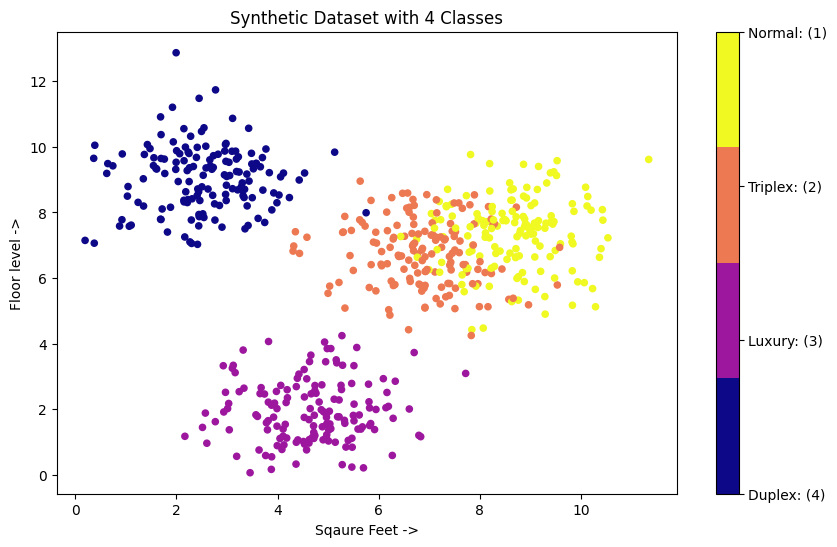

In [44]:
ns = 600
nf = 2
nc = 4
rs = 42

x,y = make_blobs(n_samples=ns,n_features=nf, centers=nc, random_state=rs)
x = abs(x)
y = abs(y)

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

classNames = ['Normal: (1)','Triplex: (2)','Luxury: (3)','Duplex: (4)']
plt.figure(figsize=(10,6))
scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=20)
#plt.xlim(1, 200)
#plt.ylim(1, 30)
cbar = plt.colorbar(scatter, ticks=range(nc))
cbar.set_ticklabels(classNames[::-1])
plt.title('Synthetic Dataset with 4 Classes')
plt.xlabel('Sqaure Feet ->')
plt.ylabel('Floor level ->')

plt.show()

In [45]:
x_train

array([[ 8.68790885,  7.68848392],
       [ 6.17187526,  7.44257637],
       [ 8.64180659,  8.03252667],
       [ 6.70062676,  3.72851053],
       [ 4.82174509,  2.22139027],
       [ 8.4563923 ,  7.75356456],
       [ 9.46389046,  7.71932645],
       [ 3.92456837,  8.59364081],
       [ 5.05281029,  1.40944513],
       [ 9.46209672,  9.23755427],
       [ 7.36178741,  8.70361427],
       [ 5.46529519,  2.78667932],
       [ 5.39686745,  1.05100436],
       [ 7.94313454,  7.95869472],
       [ 1.34603387,  9.02451919],
       [ 3.88352809,  0.55091597],
       [ 7.84031765,  4.42726754],
       [ 7.71198276,  6.40869404],
       [ 7.82902608,  4.24772753],
       [ 7.11078459,  7.75984659],
       [ 2.43939554,  8.62897253],
       [ 8.75969257,  5.32532223],
       [ 9.13589126,  8.69922973],
       [ 9.39352728,  9.20467998],
       [ 2.72886951,  9.3713987 ],
       [ 7.73014494,  6.28361699],
       [ 7.05657442,  7.67840684],
       [ 3.35599134,  7.4994389 ],
       [ 6.79306129,

In [46]:
y_train


array([3, 2, 3, 1, 1, 3, 3, 0, 1, 3, 3, 1, 1, 3, 0, 1, 3, 2, 2, 3, 0, 3,
       3, 3, 0, 3, 2, 0, 1, 2, 0, 0, 0, 3, 1, 0, 2, 3, 2, 3, 1, 0, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 1, 3, 3, 3, 1, 3, 0, 0, 2, 1, 0, 0, 1, 1, 1,
       0, 1, 3, 1, 2, 1, 3, 3, 0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1,
       1, 1, 0, 2, 3, 3, 1, 2, 2, 0, 0, 1, 3, 3, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 3, 0, 3, 2, 1, 0, 3, 3, 2, 2, 0, 0, 2, 2, 3, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 3, 2, 3, 0, 1, 2, 0, 3, 1, 0, 0, 2, 2, 1, 1, 3,
       2, 2, 0, 1, 0, 3, 2, 2, 1, 1, 2, 1, 0, 3, 2, 3, 2, 1, 0, 1, 3, 3,
       3, 3, 0, 2, 2, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 3, 0, 3, 1, 3, 3, 3,
       1, 1, 3, 2, 3, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 3, 2, 1,
       2, 2, 0, 1, 0, 3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1,
       2, 1, 0, 0, 3, 3, 2, 2, 2, 0, 2, 1, 3, 0, 2, 2, 1, 1, 2, 3, 0, 3,
       0, 1, 0, 3, 1, 0, 3, 0, 3, 0, 1, 2, 2, 3, 2, 1, 2, 2, 0, 3, 3, 3,
       0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,

In [47]:
x_test

array([[10.53128457,  7.22518329],
       [ 6.31983674,  5.79932887],
       [ 7.96826003,  7.8192048 ],
       [ 8.195605  ,  8.65267545],
       [ 2.53009922,  9.13161351],
       [ 7.59247297,  6.77367937],
       [ 2.99456117,  9.09616027],
       [ 7.43185024,  6.24717778],
       [ 5.43264931,  6.68355482],
       [ 8.88524834,  7.80056374],
       [ 3.49973395,  8.4479884 ],
       [ 4.52533899,  3.210986  ],
       [ 5.28525479,  3.34180124],
       [10.13300923,  8.4843497 ],
       [ 3.87661968,  0.16828758],
       [ 7.4532892 ,  7.42696853],
       [ 7.96068373,  5.82695674],
       [ 4.06310751,  2.72856091],
       [ 3.49070627,  9.4763896 ],
       [ 7.80286044,  8.2317942 ],
       [ 5.21415275,  5.86573953],
       [ 1.92234053, 11.20474175],
       [ 3.92143461,  1.75972253],
       [ 7.45526502,  6.75809978],
       [ 6.36196817,  7.60585341],
       [ 1.71816568,  8.10489867],
       [ 5.67741878,  1.46315329],
       [ 8.16958809,  8.17518837],
       [ 7.64885727,

In [48]:
y_test

array([3, 2, 3, 3, 0, 2, 0, 2, 2, 3, 0, 1, 1, 3, 1, 2, 2, 1, 0, 2, 2, 0,
       1, 2, 2, 0, 1, 2, 3, 1, 3, 3, 2, 0, 0, 3, 0, 2, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 0, 3, 3, 2, 3, 0, 1, 1, 0, 1, 1, 1, 0, 1, 3, 2, 0, 2, 0,
       1, 0, 0, 0, 1, 2, 3, 2, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 0, 1, 3, 3, 3, 1, 3])

In [49]:
print("Shapes of Each Data :")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shapes of Each Data :
(480, 2)
(480,)
(120, 2)
(120,)


In [50]:
class NeuralNetwork(object):
    def __init__(self) :
        iLn = 2
        hLN1 = 500
        hLN2 = 500
        hLN3 = 500
        oLn = nc
        self.eta = 0.1

        self.wHL1 = np.random.randn(iLn,hLN1)
        self.wHL2 = np.random.randn(hLN1,hLN2)
        self.wHL3 = np.random.randn(hLN2,hLN3)
        self.WO = np.random.randn(hLN3,oLn)

        self.b1 = np.zeros((1,hLN1))
        self.b2 = np.zeros((1,hLN2))
        self.b3 = np.zeros((1,hLN3))
        self.WB = np.zeros((1,oLn))


    def ForwardProp(self,x) :
        self.HO1 = self.sigmoid(np.dot(x, self.wHL1) + self.b1)
        self.HO2 = self.sigmoid(np.dot(self.HO1, self.wHL2) + self.b2)
        self.HO3 = self.sigmoid(np.dot(self.HO2, self.wHL3) + self.b3)
        self.output = self.softmax((np.dot(self.HO3, self.WO) + self.WB))

        return self.output

    def BackProp(self,x,outputValues) :
        m = x.shape[0]

        diff_out = self.output - outputValues
        d_WO = (1/m) * np.dot(self.HO3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)

        d_hidden3 = np.dot(diff_out, self.WO.T) * self.sigmoid_dev(self.HO3)
        d_W_HI3 = (1/m) * np.dot(self.HO2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_hidden3, self.wHL3.T) * self.sigmoid_dev(self.HO2)
        d_W_HI2 = (1/m) * np.dot(self.HO1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.wHL2.T) * self.sigmoid_dev(self.HO1)
        d_W_HI1 = (1/m) * np.dot(x.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)

    #Updating the neural layer's weights and biases
        self.WO -= self.eta * d_WO
        self.WB -= self.eta * d_WB
        self.wHL3 -= self.eta * d_W_HI3
        self.b3 -= self.eta * d_b3
        self.wHL2 -= self.eta * d_W_HI2
        self.b2 -= self.eta * d_b2
        self.wHL1 -= self.eta * d_W_HI1
        self.b1 -= self.eta * d_b1


    def sigmoid(self,x) :
        return 1/(1 + np.exp(-x))

    def sigmoid_dev(self,x):
        return x * (1-x)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def predict(self, x):
        probabilities = self.ForwardProp(x)
        return np.argmax(probabilities, axis=1)

    def ReLU(x,ok=False):
        if ok == True :
            return np.maximum(0, x)
        else :
            return np.where(x <= 0, 0, 1)


In [51]:
NN = NeuralNetwork()

In [52]:
# for multiple class i have encoded the output number if nth classes
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, nc)

Epoch 0,Loss: 14.479603230647365
Epoch 100,Loss: 1.3686772760033332
Epoch 200,Loss: 1.2803828788154978
Epoch 300,Loss: 0.914728551834776
Epoch 400,Loss: 1.0667104177436324
Epoch 500,Loss: 0.9613212213850117
Epoch 600,Loss: 0.7204543471613539
Epoch 700,Loss: 0.8112846206158821
Epoch 800,Loss: 0.6592394821812096
Epoch 900,Loss: 0.7682997274991794
Epoch 1000,Loss: 0.6721377764380361
Epoch 1100,Loss: 0.601725419510681
Epoch 1200,Loss: 0.5664986393566146
Epoch 1300,Loss: 0.6337230367841068
Epoch 1400,Loss: 0.5250470563309233
Epoch 1500,Loss: 0.5721662142958989
Epoch 1600,Loss: 0.6087713584451654
Epoch 1700,Loss: 0.518410396845608
Epoch 1800,Loss: 0.47208458474851583
Epoch 1900,Loss: 0.531145244764613
Epoch 2000,Loss: 0.517045392027758
Epoch 2100,Loss: 0.46482661500706945
Epoch 2200,Loss: 0.44077717844301323
Epoch 2300,Loss: 0.4282069427389078
Epoch 2400,Loss: 0.4130511750598945
Epoch 2500,Loss: 0.4051306344469972
Epoch 2600,Loss: 0.3938546912735151
Epoch 2700,Loss: 0.38505693790590384
Epoch

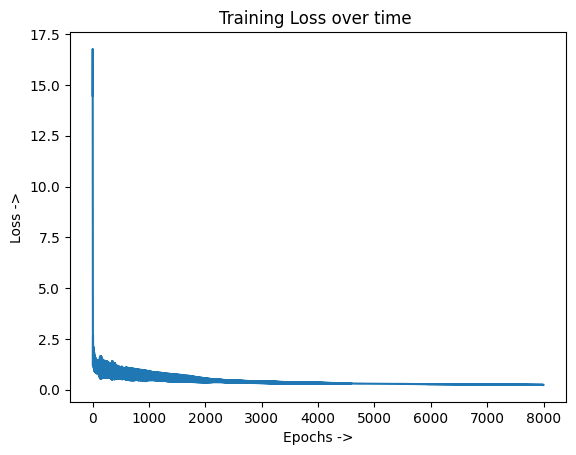

In [53]:
#Training phrase starts
err = []

epochs = 8000

for i in range(epochs):
    output = NN.ForwardProp(x_train)
    NN.BackProp(x_train, y_train_one_hot)

#Calculating loss using cross-entropy
    loss = np.mean(-np.sum(y_train_one_hot * np.log(output), axis=1))
    err.append(loss)

    if i % 100 == 0:
        print(f'Epoch {i},Loss: {loss}')

plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss over time ')
plt.show()


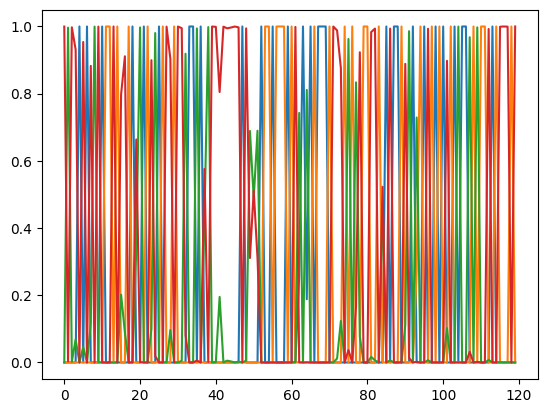

In [54]:
# testing
yPred = NN.ForwardProp(x_test)
plt.plot(yPred)

In [55]:
# test 1
area1 = 10
floor1 = 10
test1 = NN.ForwardProp([[area1, floor1]])

predicted_class = np.argmax(test1)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test1[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test1[0][predicted_class]:.4f})")



Classes with Probabilities:

Class 1 (Normal: (1)): 0.0000
Class 2 (Triplex: (2)): 0.0000
Class 3 (Luxury: (3)): 0.0001
Class 4 (Duplex: (4)): 0.9999

Predicted Class:
Duplex: (4) (0.9999)


In [56]:
# test 2
area2 = 5
floor2 = 5
test2 = NN.ForwardProp([[area2, floor2]])

predicted_class = np.argmax(test2)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test2[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test2[0][predicted_class]:.4f})")

Classes with Probabilities:

Class 1 (Normal: (1)): 0.0000
Class 2 (Triplex: (2)): 0.0944
Class 3 (Luxury: (3)): 0.9056
Class 4 (Duplex: (4)): 0.0000

Predicted Class:
Luxury: (3) (0.9056)


In [57]:
yPredCls = np.argmax(yPred, axis=1)

#Accuracy
accuracy = accuracy_score(y_test, yPredCls)
print("Accuracy of this model :", accuracy*100,'%')

Accuracy of this model : 82.5 %


In [58]:
#Precision
precision = precision_score(y_test, yPredCls, average='weighted')

In [59]:
#Recall
recall = recall_score(y_test, yPredCls, average='weighted')

In [60]:
#F1 Score
f1 = f1_score(y_test, yPredCls, average='weighted')

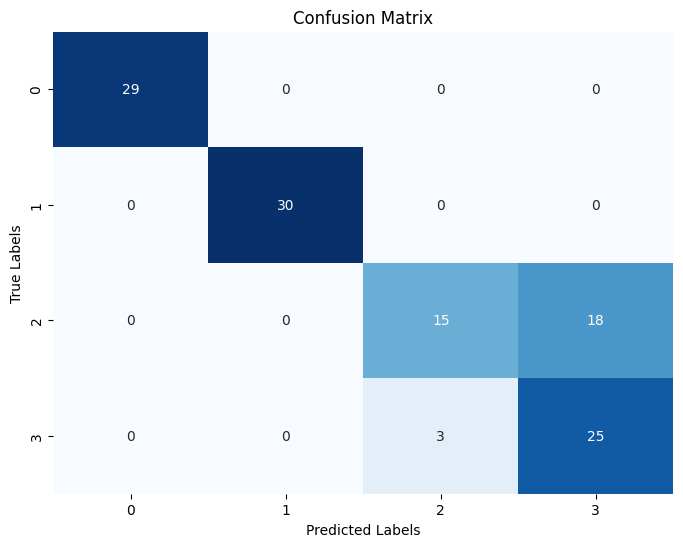

In [61]:
#Confusion Matrix
cm = confusion_matrix(y_test, yPredCls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [62]:
#Classification report
print('Classification Report:')
print(classification_report(y_test, yPredCls))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30
           2       0.83      0.45      0.59        33
           3       0.58      0.89      0.70        28

    accuracy                           0.82       120
   macro avg       0.85      0.84      0.82       120
weighted avg       0.86      0.82      0.82       120

